In [1]:
import cv2

In [4]:
img=cv2.imread('img3_man_smile.jpg')
img

array([[[194, 193, 219],
        [194, 193, 219],
        [194, 193, 219],
        ...,
        [197, 192, 219],
        [197, 192, 219],
        [197, 192, 219]],

       [[194, 193, 219],
        [194, 193, 219],
        [194, 193, 219],
        ...,
        [197, 192, 219],
        [197, 192, 219],
        [197, 192, 219]],

       [[194, 193, 219],
        [194, 193, 219],
        [194, 193, 219],
        ...,
        [197, 192, 219],
        [197, 192, 219],
        [197, 192, 219]],

       ...,

       [[201, 194, 221],
        [199, 194, 221],
        [198, 193, 224],
        ...,
        [190, 188, 217],
        [190, 188, 217],
        [190, 188, 217]],

       [[199, 194, 221],
        [199, 194, 221],
        [198, 193, 224],
        ...,
        [190, 188, 217],
        [190, 188, 217],
        [190, 188, 217]],

       [[199, 194, 221],
        [198, 195, 221],
        [198, 193, 224],
        ...,
        [190, 188, 217],
        [190, 188, 217],
        [190, 188, 217]]

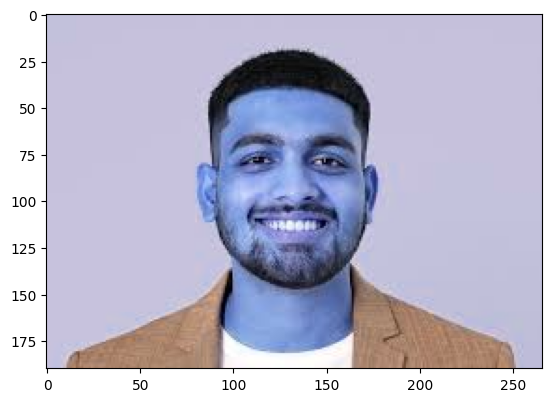

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)

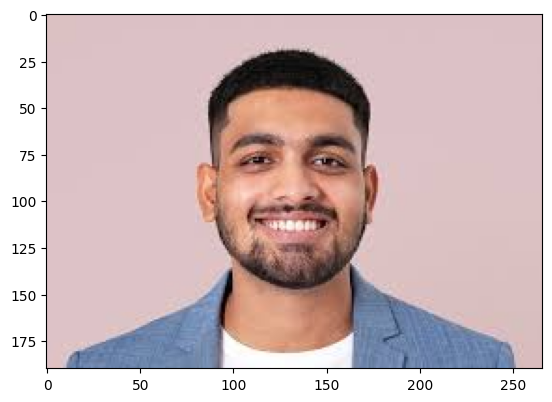

In [7]:
conv_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(conv_img)

In [8]:
eye_data=cv2.CascadeClassifier('haarcascade_eye.xml')
eye_data

< cv2.CascadeClassifier 00000143E955E350>

In [9]:
eyes = eye_data.detectMultiScale(conv_img,minNeighbors=4)
eyes

array([[ 97,  61,  33,  33],
       [137,  65,  27,  27]], dtype=int32)

In [10]:
for (x,y,w,h) in eyes:
    cv2.rectangle(conv_img,(x,y),(x+w,y+h),(0,255,0),3)

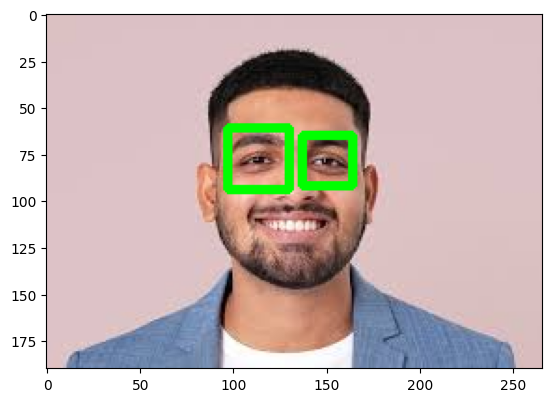

In [11]:
plt.imshow(conv_img)

In [13]:
video=cv2.VideoCapture(0)
while True:
    temp,img=video.read()
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    eyes=eye_data.detectMultiScale(img_gray,minNeighbors=8)
    for (x,y,w,h) in eyes:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imshow('video',img)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

In [15]:
video=cv2.VideoCapture('video.mp4')
while True:
    temp,img=video.read()

    if temp == True:
        img1_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        eyes=eye_data.detectMultiScale(img,minNeighbors=10)
        for (x,y,w,h) in eyes:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
        
        cv2.imshow('video',img)
        if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    else:
        print('Video Finished')
        break
video.release()
cv2.destroyAllWindows()